In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications import NASNetMobile
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn import preprocessing

In [2]:
SIZE=224

In [3]:
train_images, train_labels = [], []
for directory_path in glob.glob("Training/*"):
    tr_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        train_images.append(img)
        train_labels.append(tr_label)

In [4]:
test_images, test_labels = [], []
for directory_path in glob.glob("Testing/*"):
    ts_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        test_images.append(img)
        test_labels.append(ts_label)

In [5]:
# Convert images and labels to numpy arrays
x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(test_images)
y_test = np.array(test_labels)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8406, 224, 224, 3), (8406,), (2104, 224, 224, 3), (2104,))

In [7]:
# Encode labels from text to integers
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode y values for the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded, num_classes=5)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=5)

In [8]:
x_train.shape, y_train_one_hot.shape, x_test.shape, y_test_one_hot.shape

((8406, 224, 224, 3), (8406, 5), (2104, 224, 224, 3), (2104, 5))

In [9]:
base_model = NASNetMobile(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [10]:
from tensorflow.keras import layers 
import tensorflow as tf
for layer in base_model.layers:
    layer.trainable = False

In [11]:
base_model.trainable=False
classifier=Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5,activation='softmax'))

In [12]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = classifier.fit(x_train, y_train_one_hot, epochs=50, batch_size=32)

Epoch 1/50
263/263 [==============================] - 204s 740ms/step - loss: 3.2199 - accuracy: 0.7916
Epoch 2/50
263/263 [==============================] - 203s 771ms/step - loss: 1.5631 - accuracy: 0.8873
Epoch 3/50
263/263 [==============================] - 203s 773ms/step - loss: 1.6494 - accuracy: 0.8977
Epoch 4/50
263/263 [==============================] - 204s 774ms/step - loss: 1.1284 - accuracy: 0.9226
Epoch 5/50
263/263 [==============================] - 198s 752ms/step - loss: 0.9861 - accuracy: 0.9321
Epoch 6/50
263/263 [==============================] - 208s 789ms/step - loss: 1.2147 - accuracy: 0.9343
Epoch 7/50
263/263 [==============================] - 201s 763ms/step - loss: 1.1608 - accuracy: 0.9360
Epoch 8/50
263/263 [==============================] - 208s 792ms/step - loss: 1.0001 - accuracy: 0.9454
Epoch 9/50
263/263 [==============================] - 205s 779ms/step - loss: 1.0808 - accuracy: 0.9441
Epoch 10/50
263/263 [==============================] - 206s 781m

In [15]:
prediction_NN = classifier.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = label_encoder.inverse_transform(prediction_NN)

66/66 [==============================] - 75s 1s/step


In [16]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)

[[1173    0    8    4    4]
 [  15  104    4   22   11]
 [   5    0  149    1    1]
 [  11    8    4  102    2]
 [   5    0    1    0  470]]


In [17]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.9496197718631179


In [18]:
# Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# print(class_labels)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
# print(confusion_matrix(test_labels, prediction_NN))
print(classification_report(test_labels, prediction_NN, target_names=target_names,digits=3))

              precision    recall  f1-score   support

     Class 0      0.970     0.987     0.978      1189
     Class 1      0.929     0.667     0.776       156
     Class 2      0.898     0.955     0.925       156
     Class 3      0.791     0.803     0.797       127
     Class 4      0.963     0.987     0.975       476

    accuracy                          0.950      2104
   macro avg      0.910     0.880     0.890      2104
weighted avg      0.949     0.950     0.948      2104



In [19]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

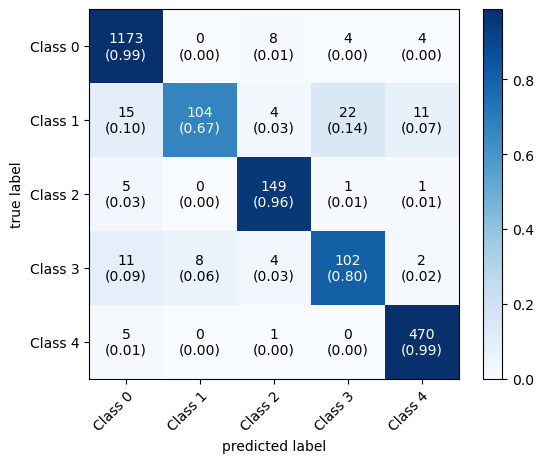

In [20]:
class_dict = {0: 'Class 0',
              1: 'Class 1',
              2: 'Class 2',
              3: 'Class 3',
              4: 'Class 4'}

multiclass = np.array([[1173,    0,    8,    4,    4],
                       [15,  104,    4,   22,   11],
                       [5,    0,  149,    1,    1],
                       [11,    8,    4,  102,    2],
                       [5,    0,    1,    0,  470]])

fig, ax = plot_confusion_matrix(
    conf_mat=multiclass,
    class_names=class_dict.values(),show_normed=True,colorbar=True)